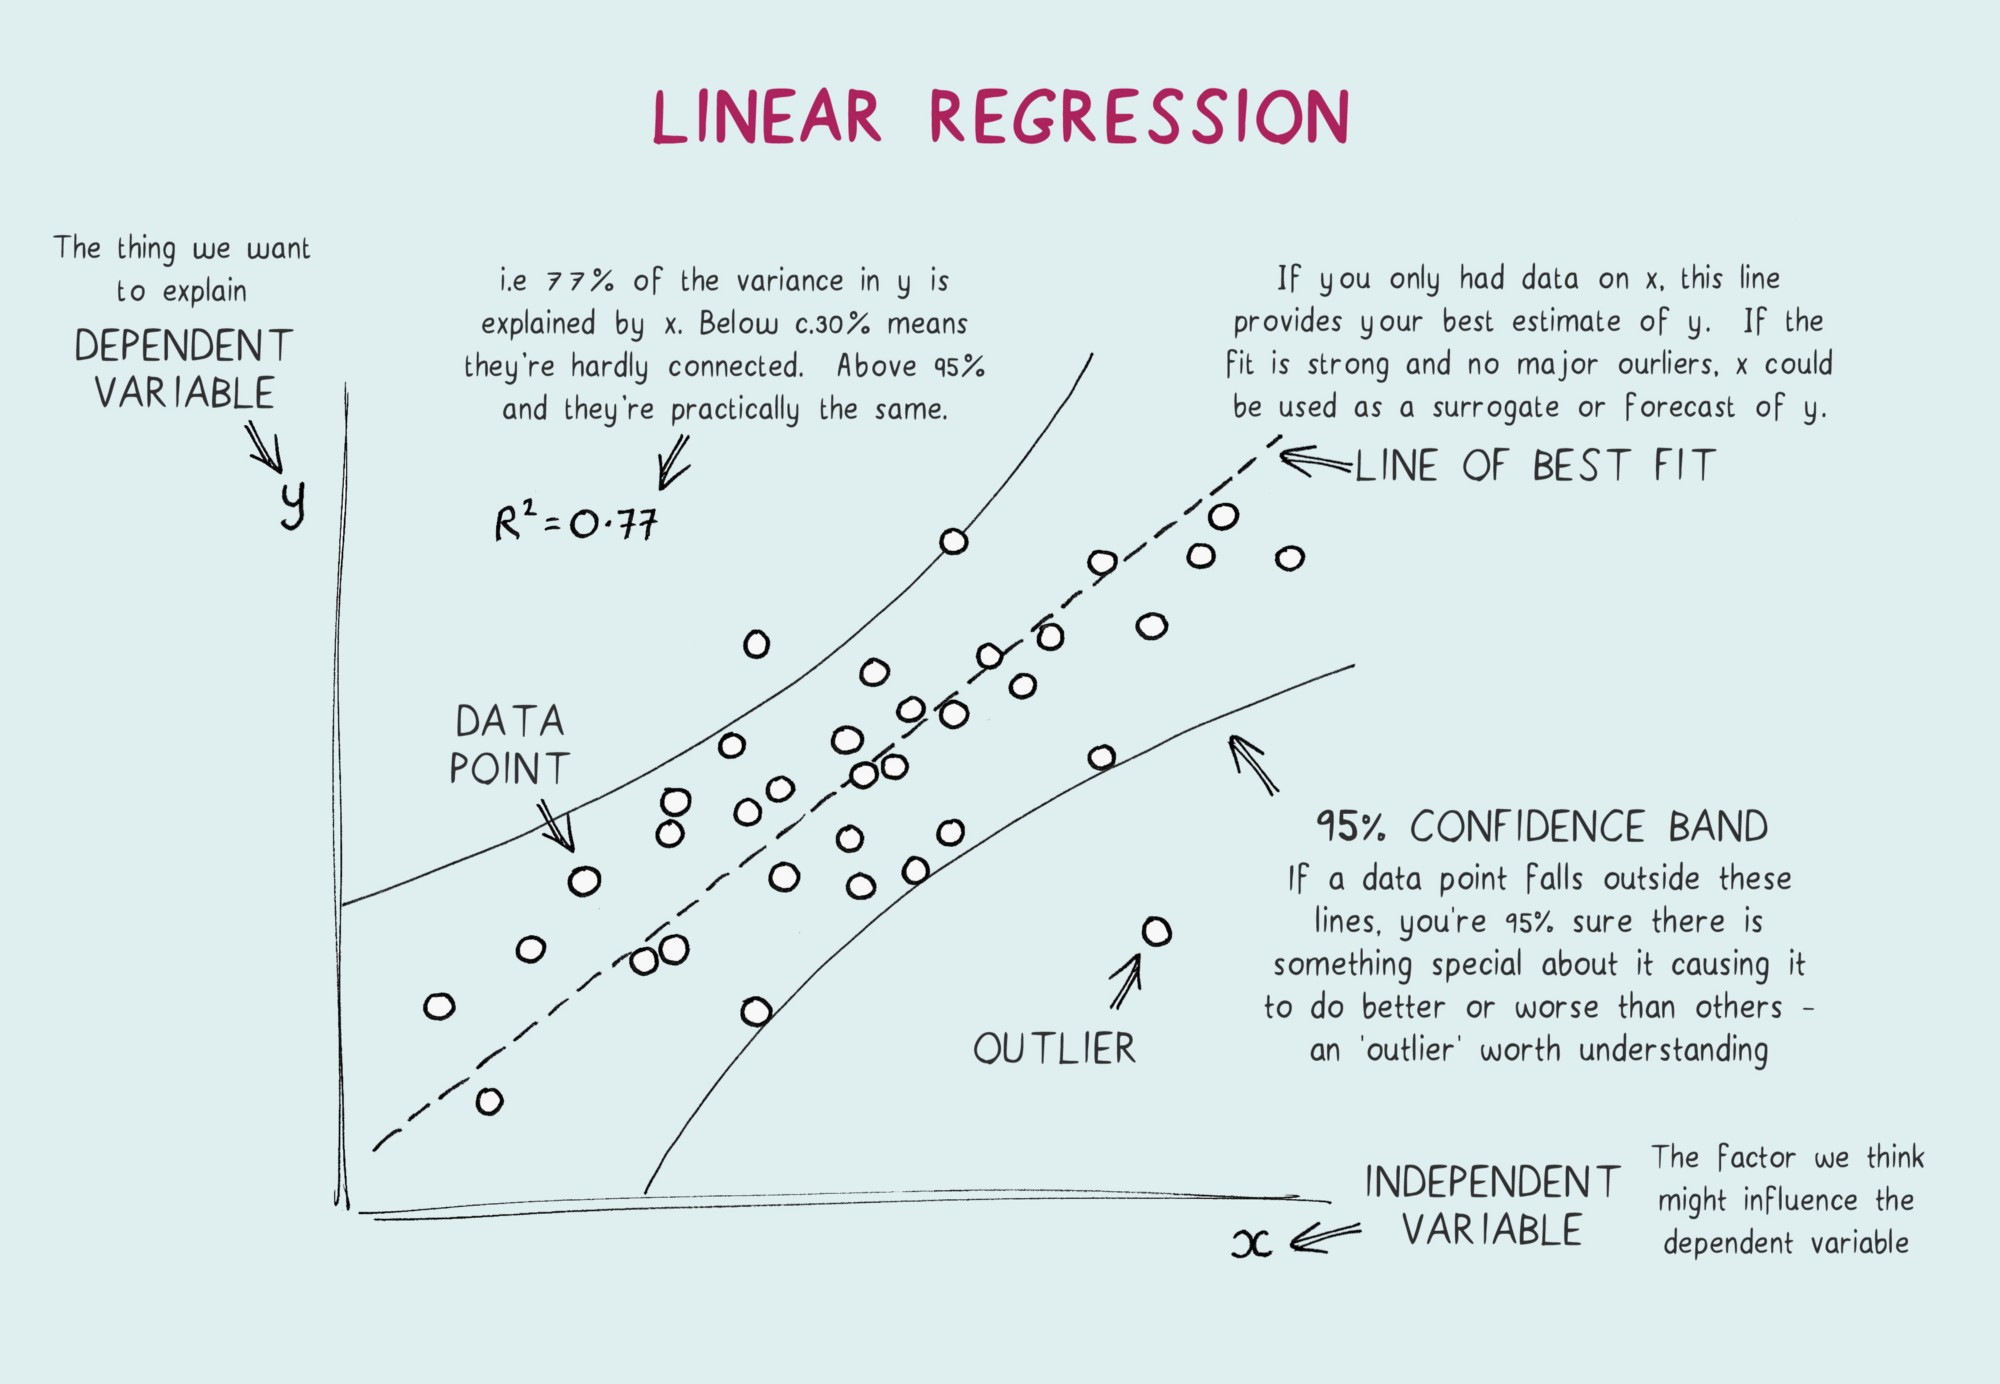

# Linear Regression

## Libraries

The `import` function is used to load libraries, or groups of functions and data sets that are not included in the base `Python` distribution. Basic functions that perform least squares linear regression and other simple analyses
are housed in the `scikit-learn` library, but more exotic functions require additional libraries. Here we load the `pandas`, `numpy`, `matplotlib`, `seaborn`, `statsmodels`, and `scikit-learn` packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

If you receive an error message when loading any of these libraries, it likely indicates that the corresponding library has not yet been installed on your system. Some libraries come with `Python` and do not need to be separately installed on your computer. However, other packages, such as `scikit-learn`, must be downloaded the first time they are used. This is why I like products like [Anaconda](https://www.anaconda.com/). Which ensures that each package talks to my version of `Python` and the other libraries I want to use.

This lab involves the `Boston` and `Carseats` data sets, so before getting started we should make sure we have them available on our computer along with our usual Python data science packages. Recall that since we are analyzing these data sets in Python instead of R, we may should make sure to download the corresponding CSV files for each set from the [book's website](http://www.statlearning.com/) under the "Data Sets and Figures" link. The corrected Boston housing data set which I am using can be downloaded from the [CMU StatLib archive](http://lib.stat.cmu.edu/datasets/boston_corrected.txt). The Carseats data set wasn't available directly as a CSV file from the book's website, so I needed to load it from the ISLR library in R and then export it.

## Simple Linear Regression

The [Boston](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) data set, which records `medv` (median house value) for 506 census tracts in Boston. We will seek to predict `medv` using 12 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status). The required data set is available in `sci-kit learn`.

In [2]:
from sklearn.datasets import load_boston
b = load_boston()
dfx = pd.DataFrame(b.data, columns = b.feature_names) #convert the data in to pandas dataframe
dfy = pd.DataFrame(b.target, columns = ['target']) #the dependant variable/outcome is the target and it is named as dfy
boston = dfx.join(dfy) #both the dataframes are combined and named as dfcombine
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

To find out more about the data set, we can type print(b.DESCR).

In [4]:
print(b.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We will start by using the `ols()` function from the `statsmodels` library to fit a simple linear regression model, with `medv` as the response and `lstat` as the predictor. The basic syntax is `ols(y ∼ x, data)`, where `y` is the response, `x` is the predictor, and `data` is the data set in which these two variables are kept. Here our response, `medv`, is listed as `target` in our Boston data.

In [5]:
medv_model = smf.ols('target ~ LSTAT', boston).fit()
medv_model

If we type est, some basic information about the model is output. For more detailed information, we use `.summary()`. This gives us $p$-values and standard errors for the coefficients, as well as the $R^2$ statistic and $F$-statistic for the model

In [6]:
medv_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           5.08e-88
Time:                        15:12:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can use the `tables()` function in order to extract information stored in `est`. 

In [7]:
medv_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.5538,0.563,61.415,0.000,33.448,35.659
LSTAT,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


When using a model generated by StatsModels, we can use the `conf_int(alpha = 0.05)` method of the RegressionResults object. Note that in StatsModels, the argument alpha refers to the *significance level*, which is equivalent to  $1−l$ , where  $l$  is the confidence level.

In [8]:
medv_model.conf_int()

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


For prediction intervals, I found the `summary_frame()` method buried [here](https://newbedev.com/python-significance-level-of-pearson-correlation-code-example) and you can find the `get_prediction()` method [here](https://www.kite.com/python/docs/statsmodels.regression.linear_model.pred.get_prediction). You can change the significance level of the confidence interval and prediction interval by modifying the `alpha` parameter.

In [9]:
# Produce 99% prediction intervals for the predicted values of CMEDV
d = {'LSTAT': [5,10,15]}
new_lstat=pd.DataFrame(data=d)
predictions = medv_model.get_prediction(new_lstat) #generally you'd pass your test data set instead of typing in values
predictions.summary_frame(alpha=0.01)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,28.755779,30.851409,13.697884,45.909305
1,25.053347,0.294814,24.291071,25.815624,8.963690,41.143004
2,20.303101,0.290893,19.550962,21.055239,4.213921,36.392280


For instance, the 95 % confidence interval associated with a lstat value of 10 is (24.29, 25.81), and the 95 % prediction interval is (8.96, 41.14). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for `medv` when `lstat` equals 10), but the latter are substantially wider.

We will now plot `medv`, or `target` in our case, and `lstat` along with the least squares regression line using the `regplot()` function in `seaborn`.

<AxesSubplot:xlabel='LSTAT', ylabel='target'>

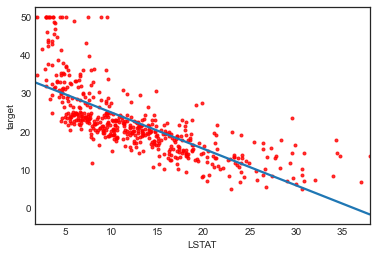

In [10]:
sns.regplot(x=boston.LSTAT, y=boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

There is some evidence for non-linearity in the relationship between `lstat` and `medv`. We will explore this issue later in this lab.

Next we examine some diagnostic plots. The `plot_regress_exog` function is a convenience function that gives a 2x2 plot containing the dependent variable and fitted values with confidence intervals vs. the independent variable chosen, the residuals of the model vs. the chosen independent variable, a partial regression plot, and a CCPR plot. This function can be used for quickly checking modeling assumptions with respect to a single regressor.

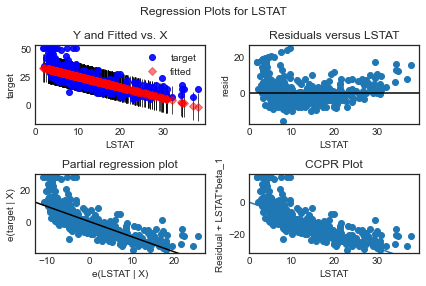

In [11]:
fig = sm.graphics.plot_regress_exog(medv_model, "LSTAT")
fig.tight_layout(pad=1.0)

Additionally, influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix. The influence of each point can be visualized by the criterion keyword argument. Options are Cook’s distance and DFFITS, two measures of influence.

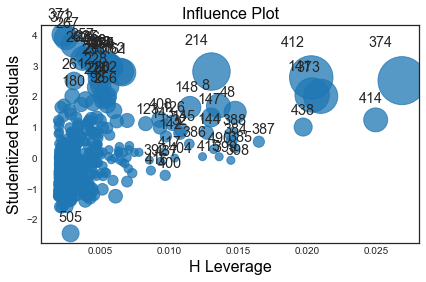

In [12]:
fig = sm.graphics.influence_plot(medv_model, criterion="cooks")
fig.tight_layout(pad=1.0)

##  Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the `ols()` function. The syntax `ols(y ∼ x1 + x2 + x3)` is used to fit a model with three predictors, `x1`, `x2`, and `x3`. The `summary()` function now outputs the regression coefficients for all the predictors.

In [13]:
# Use the terms exog (exogenous) and endog (endogenous) for X and y,
# respectively to match the language used in the StatsModels documentation
# Need to manually add a column for the intercept, as StatsModels does not
# include it by default when performing ordinary least-squares regression
exog = sm.add_constant(boston.loc[:, ["LSTAT", "AGE"]])
endog = boston["target"]

# Generate the model
mod = sm.OLS(endog, exog)

# Fit the model
res = mod.fit()

#Print out model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           2.98e-88
Time:                        15:12:51   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A quick way to peform a regression using all of the predictors in a data set is to use the `drop()` function in Pandas to drop the column containing the response variable.

In [14]:
# Use the terms exog (exogenous) and endog (endogenous) for X and y,
# respectively to match the language used in the StatsModels documentation
# Need to manually add a column for the intercept, as StatsModels does not
# include it by default when performing ordinary least-squares regression
exog = sm.add_constant(boston.drop(columns = ["target"]))
endog = boston["target"]

# Generate the model
mod = sm.OLS(endog, exog)

# Fit the model
res = mod.fit()

#Print out model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        15:12:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If we wish to access individual components of a StatsModels OLSResults object, we can access they by name. The command `dir` shows what class variables and functions are available to access. For more details, we can also look at the documentation for StatsModels.

Some fancier statistics require coding additional functions by hand. For example, while StatsModels does have a function to compute [variance inflation factors](http://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html), its current implementation can only do so for one predictor variable at a time. Thus, we will have to loop through each variable to compute the vif.

Recall that the variance inflation factor for a predictor  $X_j$  is the ratio of the variance of its coefficient  $\hat{\beta}_j$  in the full model using divided by the variance of  $\hat{\beta}_j$   in the model just using  $X_j$. Another way to compute the variance inflation factor for each variable is to use the formula

$VIF\left(\hat{\beta}_j\right)=\frac{1}{1−R_{X_j|X_{−j}}^2}$,
 
where  $R_{X_j|X_{−j}}^2$  is the  $R^2$  value from a regression using  $X_j$ as the response and the remaining variables as the predictors.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(boston.drop(columns = ["target"]))
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const      585.265238
CRIM         1.792192
ZN           2.298758
INDUS        3.991596
CHAS         1.073995
NOX          4.393720
RM           1.933744
AGE          3.100826
DIS          3.955945
RAD          7.484496
TAX          9.008554
PTRATIO      1.799084
B            1.348521
LSTAT        2.941491
dtype: float64

Variance inflation factors close to the minimum value of 1 indicate a small amount of collinearity, while values exceeding 5 or 10 are generally considered to indicate a problematic amount of collinearity. For this data, most of the variance inflation factors are low to moderate, though `RAD` and `TAX` stand out as having values on the high end.

In the multiple linear regression output, we see that `AGE` has a high *p*-value of 0.958, so we might want to exclude it. If we wish to perform regression with a small number of excluded variables the simplest thing to do is to re-run the regression after dropping the variable(s) we wish to exclude.

In [16]:
# Use the terms exog (exogenous) and endog (endogenous) for X and y,
# respectively to match the language used in the StatsModels documentation
# Need to manually add a column for the intercept, as StatsModels does not
# include it by default when performing ordinary least-squares regression
exog = sm.add_constant(boston.drop(columns = ["target", "AGE"]))
endog = boston["target"]

# Generate the model
mod = sm.OLS(endog, exog)

# Fit the model
res = mod.fit()

#Print out model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          6.08e-136
Time:                        15:12:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interaction Terms

If we wish to include interaction terms in a linear regression model using StatsModels, we can use the syntax `statsmodels.formula.api.ols(formula = "y~x1:x2", data = df)`, which uses patsy to implement R-style formula syntax which tells StatsModels to include an interaction term between `x1` and `x2`. This would give us the regression function  $y=\beta_0 + \beta_{12}x_1x_2$ . If we want to include the individual variables themselves, as well as the interaction term between them, we can use `x1*x2`, which is a shorthand for `x1 + x2 + x1:x2`. Calling `ols(formula = "y~x1*x2", data = df)` would give us the regression function  $y=\beta_0+\beta_1 x_1+\beta_2 x_2+\beta_{12} x_1 x_2$ .

In [17]:
# Using patsy to include interaction terms via R-style formulas

# Generate a linear regression model with LSTAT, AGE, and an interaction term between
# them to predict target (MEDV)
mod = smf.ols(formula = "target ~ LSTAT*AGE", data = boston)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           4.86e-88
Time:                        15:12:51   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linear transformations of the predictors

We can also use additional non-linear transformations of our variables when generating least-squares regression models. For example, if we wish to create a predictor  $X^2$  from the predictor  $X$ , we have a few different options depending on which packages we are using. Some of the options include

 - Creating a column for  $X^2$  by hand, which works for both scikit-learn and StatsModels
 - Using `np.square(X)` or `X**2` as part of an R-style formula in StatsModels
 - You could use the PolynomialFeatures transformer with scikit-learn

Let's use each of these three strategies to perform a regression of `target` onto `LSTAT` and `LSTAT**2`.

In [18]:
# Creating a column for LSTAT**2 by hand

# Use the terms exog (exogenous) and endog (endogenous) for X and y,
# respectively to match the language used in the StatsModels documentation
# Need to manually add a column for the intercept, as StatsModels does not
# include it by default when performing ordinary least-squares regression
exog = sm.add_constant(boston.loc[:, ["LSTAT"]].assign(LSTAT_sq = np.square(boston["LSTAT"])))
endog = boston["target"]

# Generate the model
mod_square = sm.OLS(endog, exog)

# Fit the model
res_square = mod_square.fit()

#Print out model summary
res_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          1.56e-112
Time:                        15:12:51   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
LSTAT_sq       0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Using patsy to include the term LSTAT**2 via R-style formulas
mod_square = smf.ols(formula = "target ~ LSTAT + np.square(LSTAT)", data = boston)
res_square = mod_square.fit()
res_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          1.56e-112
Time:                        15:12:51   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(LSTAT)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the quadratic term `LSTAT**2` has an extremely small p-value, we have evidence to believe that its inclusion leads to an improved model. To further quantify the extent to which the quadratic fit is superior to the linear fit, we can use the `anova_lm()` function from StatsModels. More details can be found in the [documentation](http://www.statsmodels.org/stable/anova.html).

In [20]:
mod_square = smf.ols(formula = "target ~ LSTAT + np.square(LSTAT)", data = boston).fit()
mod = smf.ols(formula = "target ~ LSTAT", data = boston).fit()
anova_table = sm.stats.anova_lm(mod, mod_square)
anova_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


The `anova_lm()` function performs a hypothesis test comparing the two models. The null hypothesis is that both models fit the data equally well, while the alternative hypothesis is that the second model (in our case the model including the quadratic term) performs better. Here, we have an F-statistic of about 138 and an p-value that is essentially zero, which provides strong evidence that the model containing the predictors `LSTAT` and `LSTAT**2` is a better fit than the one containing only `LSTAT`. This further confirms our initial suspicions based on the non-linearity we saw in the scatter plot for MEDV (`target`) and `LSTAT`.

As discussed earlier, there are a few different ways of generating residual plots for us to have visual evidence that a model containing the predictors `LSTAT` and `LSTAT**2` is a better fit than the one containing only `LSTAT`. First, we can set the order parameter in Seaborn's `residplot()` function to generate residual plots for higher-order polynomial regression. For completeness, we first use Seaborn to plot the quadratic fit on a scatterplot of the data as well.

<AxesSubplot:xlabel='LSTAT', ylabel='target'>

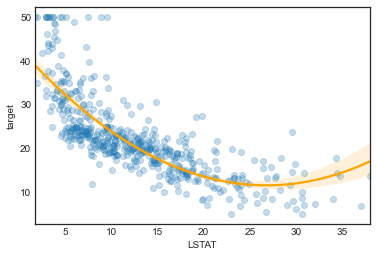

In [21]:
# Plot scatterplot with regression line and default 95% confidence interval for regression estimate
# Set the marker transparancy to 0.25 in order to more clearly see the regression line
# Make regression line orange so it is more visible
sns.regplot(x = "LSTAT", y = "target", data = boston, order = 2, scatter_kws = {"alpha":0.25}, line_kws = {"color":"orange"})

<AxesSubplot:xlabel='LSTAT', ylabel='target'>

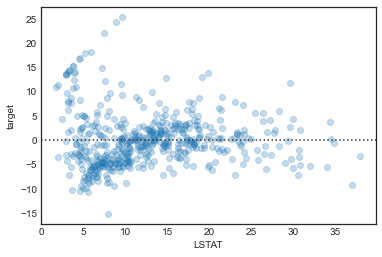

In [22]:
# Set the marker transparency to 0.25 in order to improve visibility
sns.residplot(x = "LSTAT", y = "target", data = boston, order = 2, scatter_kws = {"alpha":0.25})

If we wish to include higher-order predictors of the form  $X_k$ , the strategy of adding those columns by hand becomes less convenient. It is still doable by appropriately adjusting the how we call the `assign()` function to add columns to our dataframe. Let's demonstrate this by producing a fifth-order polynomial fit.

In [23]:
# Creating a fifth-order polynomial fit by hand

# Use the terms exog (exogenous) and endog (endogenous) for X and y,
# respectively to match the language used in the StatsModels documentation
# Need to manually add a column for the intercept, as StatsModels does not
# include it by default when performing ordinary least-squares regression
exog = sm.add_constant(boston.loc[:, ["LSTAT"]].assign(LSTAT_2 = boston["LSTAT"]**2,
                                                      LSTAT_3 = boston["LSTAT"]**3,
                                                      LSTAT_4 = boston["LSTAT"]**4,
                                                      LSTAT_5 = boston["LSTAT"]**5))
endog = boston["target"]

# Generate the model
mod_quint = sm.OLS(endog, exog)

# Fit the model
res_quint = mod_quint.fit()

#Print out model summary
res_quint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          8.73e-122
Time:                        15:12:52   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.000      60.618      74.781
LSTAT        -11.9911      1.526     -7.859      0.000     -14.989      -8.994
LSTAT_2        1.2728      0.223      5.703      0.000       0.834       1.711
LSTAT_3       -0.0683      0.014     -4.747      0.000      -0.097      -0.040
LSTAT_4        0.0017      0.000      4.143      0.000       0.001       0.003
LSTAT_5    -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It is more convenient to use the PolynomialFeatures transformer from scikit-learn. I just didn't do it here.

This summary suggests that including additional polynomial terms further improves the model fit. Remember that we do not care about the coefficient values when evaluating model fit. We care about statistical indicators such as the  $R^2$  value for each model. Further investigation of the data indicates that polynomial terms beyond fifth order do not have significant p-values in a regression fit. Before moving on to other non-linear transformations of the predictors, note that we can use Python's string manipulation capabilities as another way of more conveniently performing higher order polynomial fits when using R-style formulas in StatsModels.

In [24]:
# Using Python string manipulation alongside patsy to create fifth-order polynomial fit

# Create string for the higher-order polynomial terms
poly_terms = "+".join(["I(LSTAT**{0})".format(i) for i in range(2, 6)])
# Join this string with the rest of the formula I wish to use
my_formula = "target ~ LSTAT + " + poly_terms
mod_quint = smf.ols(formula = my_formula, data = boston)
res_quint = mod_quint.fit()
res_quint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          8.73e-122
Time:                        15:12:52   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
LSTAT           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(LSTAT ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(LSTAT ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(LSTAT ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(LSTAT ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One last thing to note is that we can use other non-linear transformations of the predictors. For example, we can do a logarithmic model where the predictor is  $ln(X)$ , and  $X$  is `RM`, the average number of rooms.

In [25]:
# Creating a column for log(RM) by hand, using StatsModels
# Here log refers to the natural logarithm

# Use the terms exog (exogenous) and endog (endogenous) for X and y,
# respectively to match the language used in the StatsModels documentation
# Need to manually add a column for the intercept, as StatsModels does not
# include it by default when performing ordinary least-squares regression
exog = sm.add_constant(np.log(boston["RM"].rename("log(RM)")))
endog = boston["target"]

# Generate the model
mod_log = sm.OLS(endog, exog)

# Fit the model
res_log = mod_log.fit()

#Print out model summary
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.22e-64
Time:                        15:12:52   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -76.4878      5.028    -15.213      0.000     -86.366     -66.610
log(RM)       54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Using patsy to include the term log(RM) via R-style formulas

mod_log = smf.ols(formula = "target ~ np.log(RM)", data = boston)
res_log = mod_log.fit()
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.22e-64
Time:                        15:12:52   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(RM)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Qualitative Predictors

Next we'll examine the `Carseats` data set from the ISLR library and attempt to predict `Sales` (child car seat sales) in 400 locations based on a number of predictors. To start with, we'll do our usual overview inspection of the first few rows of the data set and then check for missing values.

In [27]:
# Load the Carseats data set
# Use the unnamed zeroth column as the index
carseats_filepath = "Carseats.csv"
carseats = pd.read_csv(carseats_filepath)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [28]:
carseats.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

Looking at the data, we see that there are a number of qualitative predictors. For example, the ShelveLoc predictor is an indicator of the quality of the shelving location, or the space within a store in which the car seat is displayed, at each location. This predictor takes on three possible values: Bad, Medium, and Good. If we include a qualitative variable in `statsmodels.formula.api.ols()`, Patsy will automatically generate dummy variables for the possible values of that variable. For more details on how this is done, we can refer to a tutorial on [contrast coding systems for categorical variables with Patsy](http://www.statsmodels.org/stable/contrasts.html) on the StatsModels documentation site, as well as the official [Patsy documentation for coding categorical data](https://patsy.readthedocs.io/en/latest/categorical-coding.html). Now we'll create a multiple regression model that also includes some interaction terms. Note that as far as I can tell (as of November 2019), Patsy currently does not have an equivalent to `.` to include all columns in the way `R` can do this. However, following [this StackExchange post](https://stackoverflow.com/a/22388673), we can use Python string manipulation for this purpose.

In [29]:
# Using patsy to include the perform multiple regression using the Carseats data
# Include interaction terms for Income:Advertising and Price:Age
# Note that there are some qualitative predictors

# Create string for the names of all of the columns
all_columns = "+".join(carseats.columns.drop("Sales"))
# Join this string with the rest of the formula I wish to use
my_formula = "Sales ~" + all_columns + "+ Income:Advertising + Price:Age"
mod = smf.ols(formula = my_formula, data = carseats)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          6.14e-166
Time:                        15:12:52   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By default, Patsy uses [treatment (dummy) coding](https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.Treatment), though there are lots of other contrast coding options we can explore in the linked documentation. In addition, by default the reference is the first level (using alphabetical order), though we have the option to specify this explicitly if we wish. Here we see that Patsy created a dummy variable `ShelveLoc[T.Good]` which is equal to 1 if the shelving location is good and 0 otherwise, along with a dummy variable `ShelveLoc[T.Medium]` which is equal to 1 if the shelving location is medium and 0 otherwise. With this encoding, a bad shelving location corresponds to both dummy variables having a value of 0. The positive coefficients for `ShelveLoc[T.Good]` and `ShelveLoc[T.Medium]` in the regression output indicates that good or medium shelving locations contribute to higher sales compared to a bad location. The higher value of the coefficient for `ShelveLoc[T.Good]` indicates that a good shelving location has leads to a bigger increase in sales (over a bad location) than a medium shelving location.